In [ ]:
from keras import datasets

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

In [ ]:
x_train.shape, y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape, y_test.shape

((10000, 32, 32, 3), (10000, 1))

Class:  [9]


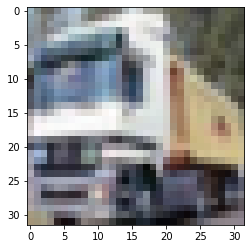

In [ ]:
import matplotlib.pyplot as plt 
plt.imshow(x_train[1])
print("Class: ", y_train[1])

Cifar10 classes:

0: airplane										
1: automobile										
2: bird										
3: cat										
4: deer										
5: dog										
6: frog										
7: horse										
8: ship										
9: truck

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(32,32,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128, (3,3), activation = "relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.2))
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization_56 (Batc (None, 30, 30, 32)        128       
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_57 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_58 (Batc (None, 12, 12, 64)      

In [ ]:
train_images =x_train.astype('float32')/255
test_images=x_test.astype('float32')/255

In [ ]:
from keras.utils.np_utils import to_categorical

train_labels=to_categorical(y_train)
test_labels=to_categorical(y_test)

In [ ]:
val_images=train_images[:10000]
partial_images=train_images[10000:]

val_labels=train_labels[:10000]
partial_labels=train_labels[10000:]

In [ ]:
from keras import optimizers
model.compile(loss="categorical_crossentropy",optimizer=optimizers.Adam(0.01),metrics=["accuracy"])

In [ ]:
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor= "val_accuracy", patience = 7)

In [ ]:
history = model.fit(partial_images, partial_labels, validation_data=(val_images,val_labels), epochs=60, callbacks=[es])

Epoch 1/60
1250/1250 [==============================] - 7s 5ms/step - loss: 1.7177 - accuracy: 0.3803 - val_loss: 1.5234 - val_accuracy: 0.4786
Epoch 2/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.3373 - accuracy: 0.5290 - val_loss: 1.3621 - val_accuracy: 0.5346
Epoch 3/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.1835 - accuracy: 0.5919 - val_loss: 1.1787 - val_accuracy: 0.5770
Epoch 4/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0834 - accuracy: 0.6269 - val_loss: 1.2207 - val_accuracy: 0.5975
Epoch 5/60
1250/1250 [==============================] - 6s 5ms/step - loss: 1.0220 - accuracy: 0.6535 - val_loss: 1.1342 - val_accuracy: 0.6226
Epoch 6/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9689 - accuracy: 0.6715 - val_loss: 0.9597 - val_accuracy: 0.6716
Epoch 7/60
1250/1250 [==============================] - 6s 5ms/step - loss: 0.9314 - accuracy: 0.6867 - val_loss: 1.0591 - val_accuracy:

In [ ]:
metrics = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 1.0119 - accuracy: 0.7296


In [ ]:
print("Loss: ", metrics[0])
print("Accuracy: ",metrics[1])

Loss:  1.0119237899780273
Accuracy:  0.7296000123023987
